## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage. 

**Data Dictionary for Market Segmentation:**

    spending: Amount spent by the customer per month (in 1000s)
    advance_payments: Amount paid by the customer in advance by cash (in 100s)
    probability_of_full_payment: Probability of payment done in full by the customer to the bank
    current_balance: Balance amount left in the account to make purchases (in 1000s)
    credit_limit: Limit of the amount in credit card (10000s)
    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # For KMeans Cluster
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # For Hirarchy Cluster
%matplotlib inline

### 1. Read the data and do exploratory data analysis. Describe the data briefly.

In [2]:
# Read the bank data
bank_df = pd.read_csv("bank_marketing_part1_Data.csv")
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
print(f'There are {bank_df.shape[0]} rows and {bank_df.shape[1]} columns in the data')

There are 210 rows and 7 columns in the data


In [4]:
bank_df.info() # Info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
print(f'There are {bank_df.isnull().sum().sum()} null values in the data')

There are 0 null values in the data


In [7]:
print(f'There are {bank_df.duplicated().sum()} dupliate values in the data')

There are 0 dupliate values in the data


In [8]:
bank_df.describe() # Description of the data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


C:\Users\Om\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


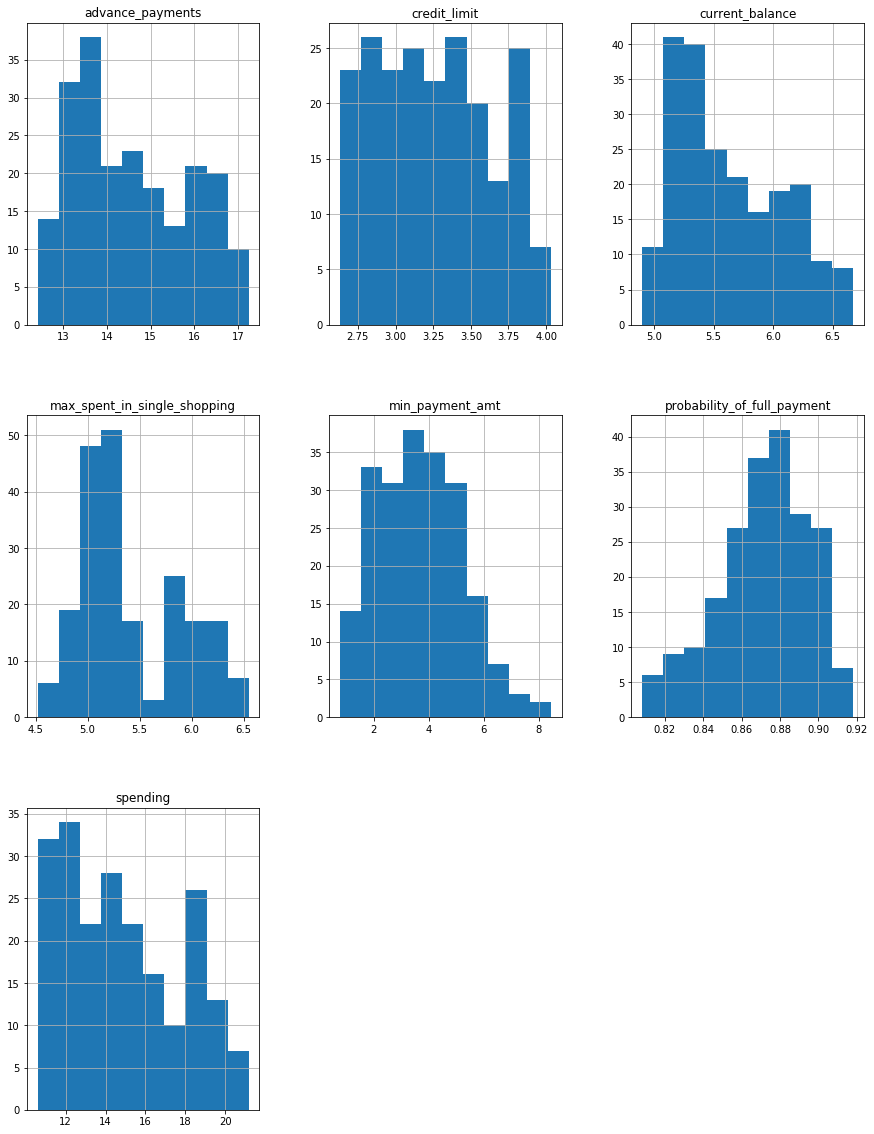

In [9]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
bank_df.hist(ax = ax)
plt.show()

In [10]:
bank_df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

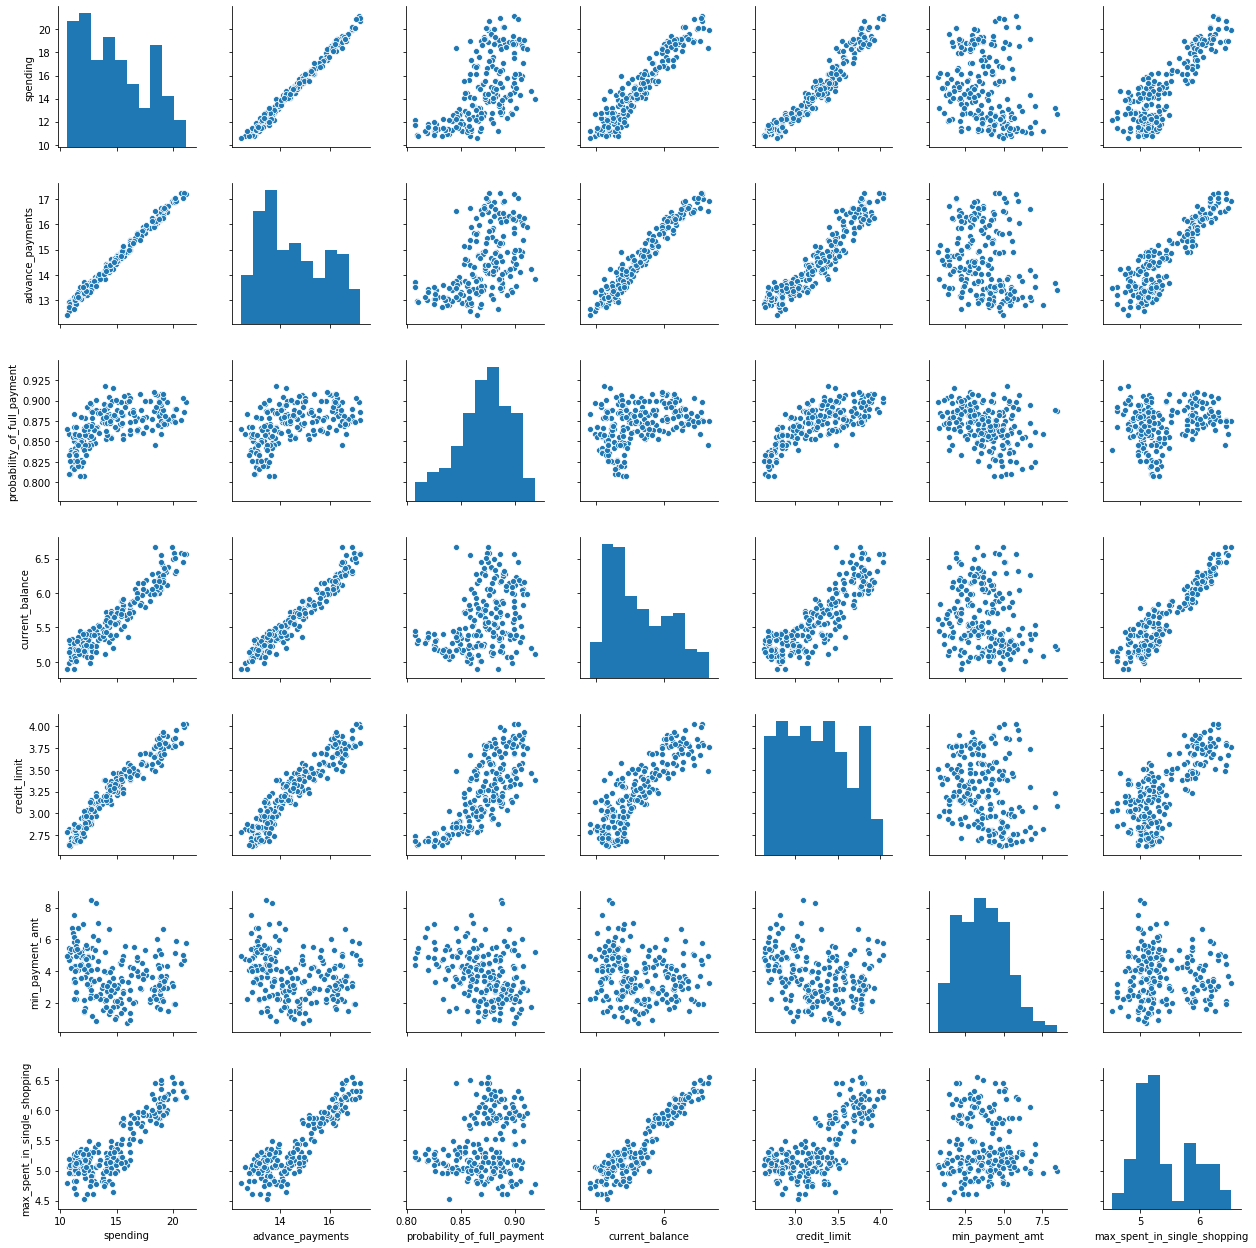

In [11]:
sns.pairplot(bank_df);

In [12]:
df_corr = bank_df.corr()
df_corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


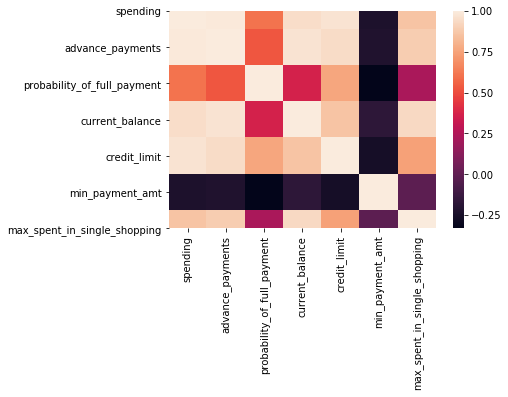

In [13]:
sns.heatmap(df_corr);

**The data is about credit card usage, There are 210 entries and 7 columns with 0 null values and all the variable types are continuous. Also, There are no dupliate values in the data. The describe function depicts the Averages of columns are not similar. The histograms depicts that some of the columns data are not normally distributed. Pairplot shows a strong relationship among all the variables, The correlation is verified through heatmap as well.**

### 2 Do you think scaling is necessary for clustering in this case? Justify.

**There are 7 columns, The column values are in 10000s, 1000s, 100s & probabilities. Also, the averages of the columns are far from each other, Therefore Yes, Scaling is required for clustering.**

In [14]:
from sklearn.preprocessing import StandardScaler # importing library for scaling the data
X = StandardScaler() # Initializing the object

In [15]:
scaled_df = X.fit_transform(bank_df) # Fit and Transform the data
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [16]:
scaled_df = pd.DataFrame(scaled_df, columns=bank_df.columns) # Creat a DataFrame with scaled values
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


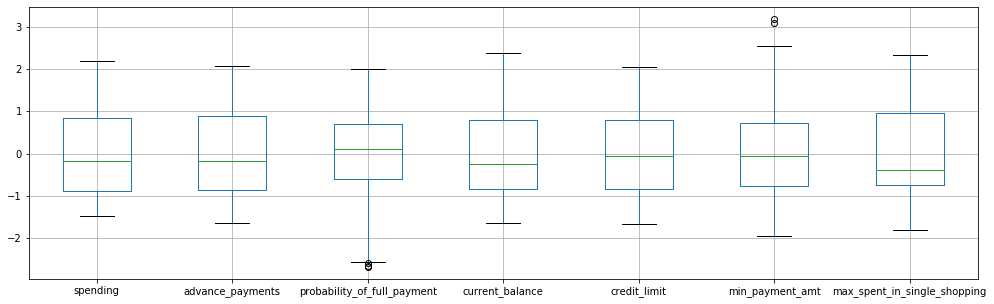

In [17]:
# checking distributions using boxplots
fig = plt.figure(figsize = (17,5))
ax = fig.gca()
scaled_df.boxplot(ax = ax)
plt.show()

In [18]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [19]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


### 3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them. 

In [20]:
linkage = linkage(scaled_df, method="ward")

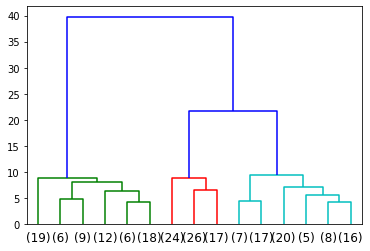

In [21]:
dendo = dendrogram(linkage, truncate_mode='lastp', p=15, color_threshold=15)

**As per the dendrogram, The optimum clusters are 3**

In [22]:
h_cluster = fcluster(linkage, 15, criterion='distance')
h_cluster

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [23]:
bank_df['h_cluster'] = h_cluster

In [24]:
clust_df = bank_df.groupby('h_cluster')

In [25]:
gp_k_clust = clust_df.mean()

In [26]:
# Lets convert the values in actual scale to understand the values
gp_k_clust[['spending', 'current_balance', 'max_spent_in_single_shopping']] *= 1000
gp_k_clust[['advance_payments', 'min_payment_amt']] *= 100
gp_k_clust[['credit_limit']] *= 10000
gp_k_clust.round(decimals=2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
h_cluster,,,,,,,
1,18371.43,1614.54,0.88,6158.17,36846.29,363.92,6017.37
2,11872.39,1325.70,0.85,5238.94,28485.37,494.94,5122.21
3,14199.04,1423.36,0.88,5478.23,32264.52,261.22,5086.18


### 4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [27]:
wss = []
for i in range(1,15):
    KM = KMeans(n_clusters=i, random_state = 23)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.24193066313256,
 328.180247142173,
 289.88118487146994,
 267.0461447156471,
 240.16142796849869,
 225.89910251252866,
 205.9243258680202,
 193.48686454014546,
 182.24515642616979,
 175.18481448433593,
 168.42102063390587]

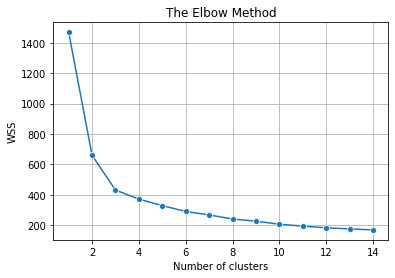

In [28]:
sns.lineplot(range(1,15), wss, marker='o')
plt.grid(axis='both')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
for i in range(2, 11):
    clusteres = KMeans(n_clusters = i, random_state = 23)
    y=clusteres.fit_predict(scaled_df)
   # The higher (up to 1) the better
    s =silhouette_score(scaled_df, y )
    print("silhouette =",s, "for i=", i)

silhouette = 0.46577247686580914 for i= 2
silhouette = 0.4007270552751299 for i= 3
silhouette = 0.33448539371108893 for i= 4
silhouette = 0.27363826191254537 for i= 5
silhouette = 0.2766761829311934 for i= 6
silhouette = 0.25297596581305654 for i= 7
silhouette = 0.260168441107939 for i= 8
silhouette = 0.2508578610995885 for i= 9
silhouette = 0.253053984192842 for i= 10


In [31]:
KM = KMeans(n_clusters=3, random_state = 23)
KM.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [32]:
k_clusters = KM.labels_

In [33]:
silhouette_score(scaled_df, k_clusters)

0.4007270552751299

In [34]:
silhouette_samples(scaled_df, k_clusters).min()

0.002713089347678533

**As per the Silhoutte Score and Elbow Plot, The optimum number of clusters are 3**

In [35]:
bank_df['k_clusters'] = k_clusters
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,h_cluster,k_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [36]:
df1 = bank_df.drop(['h_cluster'], axis=1)

In [37]:
grouped_df = df1.groupby(['k_clusters'])

In [38]:
gp_k_clust = grouped_df.mean()

### 5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [39]:
# Lets convert the values in actual scale to understand the values
gp_k_clust[['spending', 'current_balance', 'max_spent_in_single_shopping']] *= 1000
gp_k_clust[['advance_payments', 'min_payment_amt']] *= 100
gp_k_clust[['credit_limit']] *= 10000
gp_k_clust.round(decimals=2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
k_clusters,,,,,,,
0,18495.37,1620.34,0.88,6175.69,36975.37,363.24,6041.70
1,11856.94,1324.78,0.85,5231.75,28495.42,474.24,5101.72
2,14437.89,1433.77,0.88,5514.58,32592.25,270.73,5120.80


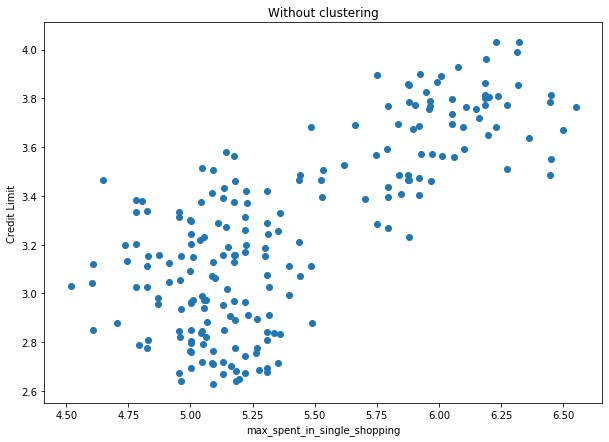

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(bank_df['max_spent_in_single_shopping'], bank_df['credit_limit'])
plt.title('Without clustering')
plt.xlabel('max_spent_in_single_shopping')
plt.ylabel('Credit Limit')
plt.show()

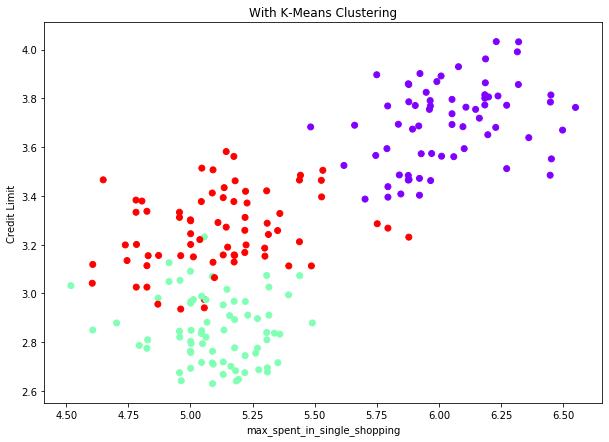

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(bank_df['max_spent_in_single_shopping'], bank_df['credit_limit'], c=bank_df['k_clusters'], cmap='rainbow')
plt.title('With K-Means Clustering')
plt.xlabel('max_spent_in_single_shopping')
plt.ylabel('Credit Limit')
plt.show()

**The example of k-means clusters can be seen in above example, where max spent in single shopping has linear relationship with credit limit. The scatter plot depicts that, max spent in single shopping is more if the credit limit is more.**